## 1. MNIST-FASHION 데이터 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('./archive/fashion-mnist_train.csv', sep=',')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


입력 데이터 : 784차원\
부류 : 총 10가지

In [7]:
train_data = np.array(train_data, dtype = 'float32')

In [8]:
x_train = train_data[:,1:]
y_train = train_data[:,0]

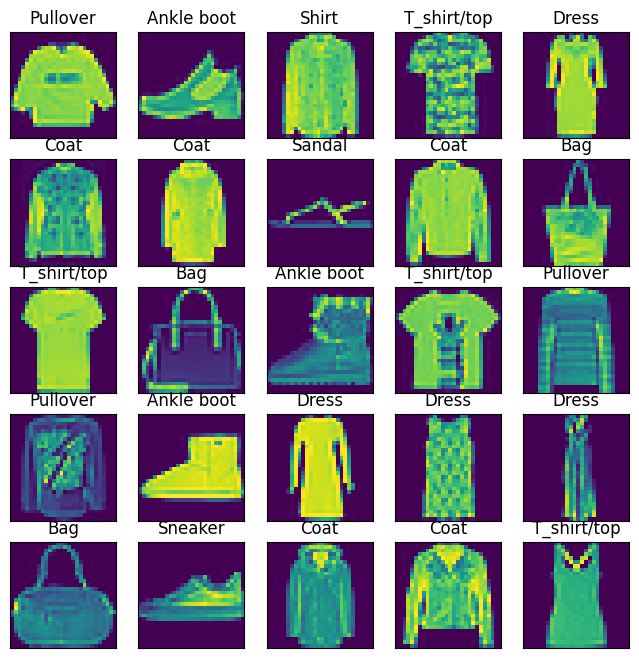

In [15]:
# 데이터 확인해보기
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 8))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

---

## 2. SVM 적용하기

A. 학습 및 추론(inference)에 사용하는 입력 이미지의 정규화 과정(normalization) 및 전처리 과정(preprocessing)\
B. PCA(Principal Component Analysis) 기법을 통한 Feature vector의 차원축소\
C. SVM 영상 분류기의 일반화 능력을 높이기 위한 방법(예를 들면, 앙상블 기법을 도입한 혼성모델 사용)\
D. 학습에 사용한 최적화 알고리즘과 사용된 hyperparameters 설정

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, KernelCenterer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
# from yellowbrick.contrib.classifier import DecisionViz

train_df = pd.read_csv('./archive/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./archive/fashion-mnist_test.csv', sep=',')
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype = 'float32')

In [2]:
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

X_test = test_data[:, 1:]
y_test = test_data[:, 0]

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,
                                                         test_size = 0.2,random_state = 12345)

#### 정규화, 전처리, PCA

In [9]:
svm_pca = Pipeline([
    ("std", StandardScaler()), # normalization
    # ("kernel", KernelCenterer()), # 커널 함수
    ("pca", PCA(n_components=392)), # 주성분
    ("lsvm", LinearSVC(C=1, loss='squared_hinge'))
])
svm_pca.fit(X_train, y_train)
y_pred = svm_pca.predict(X_test)
accuracy_score(y_pred, y_test)

/home/iuser/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/iuser/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8441

#### 정규화, 전처리, PCA, 커널=poly

In [3]:
from sklearn.svm import SVC

svm_kn = Pipeline([
    ('std', StandardScaler()),
    ('pca', PCA(n_components=392)),
    ("svm", SVC(kernel='poly', C=0.1))
])

svm_kn.fit(X_train, y_train)
y_pred = svm_kn.predict(X_test)
accuracy_score(y_pred, y_test)

0.8334

#### linear, C 조절

In [3]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)

svm_li = LinearSVC(loss='hinge')
param_C = {'C' : [0.001, 0.01, 0.1, 1, 10]}

grid_svm_li = GridSearchCV(svm_li, param_grid=param_C, scoring='accuracy')
grid_svm_li.fit(x_train_scaled, y_train)

result = pd.DataFrame(grid_svm_li.cv_results_['params'])
result['mean_test_score'] = grid_svm_li.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score')

/home/iuser/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/iuser/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/iuser/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/iuser/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/iuser/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set

,C,mean_test_score
4,10.000,0.795783
0,0.001,0.829200
3,1.000,0.843517
1,0.010,0.846217
2,0.100,0.849067
